<a href="https://www.analytiksinc.com">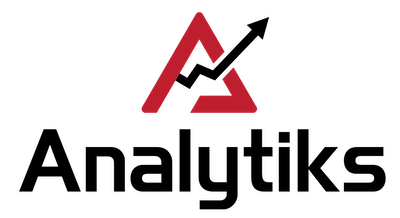</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Clustering stocks using KMeans

<b>Dataset:</b> <i> Company Stock Movements.csv</i>

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#### Normalizer vs StandardScaler 
Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

## Import Libraries

### Standard Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline

### Additional Libraries

In [4]:
from sklearn.preprocessing import Normalizer

## Load and Explore the Dataset

In [5]:
df = pd.read_csv('Company Stock Movements.csv',index_col='Unnamed: 0')
df.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [6]:
df.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197502,-0.202501,-0.097504,-0.035000
50%,0.295000,0.010001,-0.005000,0.084993,0.150000,-0.059998,0.070000,0.205002,0.139999,-0.360000,...,0.335005,0.454998,0.035002,0.000000,0.175000,-0.085000,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.804999,1.139999,0.345000,0.192502,0.577495,0.147498,0.382501,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Apple to Yahoo
Columns: 963 entries, 04/01/2010 to 29/10/2013
dtypes: float64(963)
memory usage: 451.9+ KB


## Normalize the Dataset

In [8]:
X = df.copy()

In [9]:
transformer = Normalizer().fit(X)
X_scaled=transformer.transform(X)

In [10]:
df_norm=pd.DataFrame(X_scaled,columns=df.columns,index=df.index)

In [11]:
df_norm.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


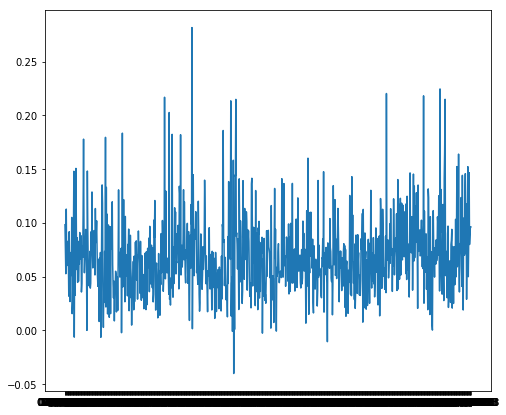

In [34]:
plt.figure(figsize=(8,7))
plt.plot(df_norm.max())
plt.show()

## Run K Means
<i> Make sure to use the Normalized dataset and set random_state to 30 </i>

### Find the optimal k

In [18]:
clust=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
k_score=[]
for n_clusters in clust:
    kmeans = KMeans(n_clusters=n_clusters, random_state=30)
    kmeans.fit(df_norm)
    k_score.append(kmeans.inertia_)
    print(kmeans.inertia_)

35.665008628263585
33.41637918658173
32.251636785671465
30.9144674210179
29.890256211303292
28.90704732975482
28.1280881355861
27.135066571670183
26.26951266585095
25.231967071939312
24.820335143337456
23.982686671760458
22.959632545114058
22.370415247170673
21.4149707040213
21.02509675409134
20.08545377289305
19.548128937616113


Text(0, 0.5, 'Score')

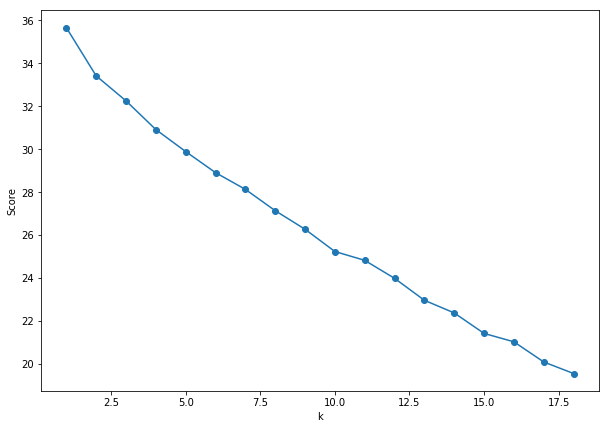

In [19]:
plt.figure(figsize=(10,7))
plt.plot(clust,np.abs(k_score),marker='o')
plt.xlabel('k')
plt.ylabel('Score')

### Run K Means

In [20]:
kmeans=KMeans(4,random_state=30)
kmeans.fit(df_norm)
k4_labels=kmeans.labels_
df_k4=df_norm.copy()
df_k4['label']=k4_labels

In [21]:
df_k4.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,label
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020,0
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806,2
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156,0
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595,2
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541,0


### List Stocks and their Labels / Clusters in a DataFrame to report which Stocks move together

In [22]:
df_final=pd.DataFrame(df_k4['label'],index=df_k4.index)

In [26]:
df_final.sort_values('label')

,label
Apple,0
Texas instruments,0
Taiwan Semiconductor Manufacturing,0
Symantec,0
Northrop Grumman,0
Microsoft,0
MasterCard,0
Intel,0
IBM,0
HP,0


## Run Hierarchichal Clustering and Visualize as a Dendogram

In [37]:
from scipy.cluster import hierarchy

In [41]:
linked=hierarchy.linkage(df_norm,method='single')

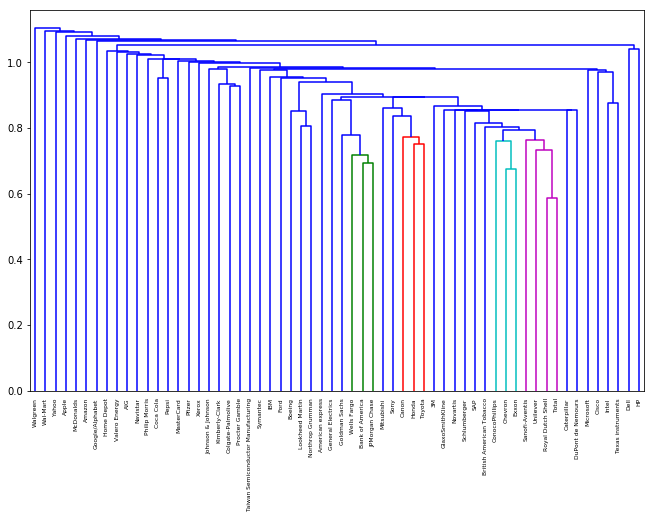

In [43]:
plt.figure(figsize=(11,7))
hierarchy.dendrogram(linked,labels=df_norm.index,distance_sort='descending')
plt.show()